In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import ipympl
import math

import tkinter as tk
from tkinter import ttk
from tkinter import messagebox  # Import the messagebox module

from library_analysis import *
from library_gui import *
from library_vna import *
from library_power_supply import *






In [2]:
def analysis(measurement_path: str) -> None:

    freq, fields, amplitudes, phases = load_measurement(measurement_path)
    set_default_pyplot_style_settings()
    [traces, Us] = analysisFMR_Maria(freq, fields, amplitudes, phases, measurement_path, show_plots=True)  # Plots imag(U), real(U), trasmission
    [re_trace, im_trace, re_ref, im_ref] = analysisFMR_MariaPhase(freq, fields, amplitudes, phases, measurement_path, show_plots=True) 

    return(traces, freq, fields,re_trace, im_trace, re_ref, im_ref)

In [3]:
if __name__ == "__main__":
    print("*** LOG SCREEN ***")
    n_traces = 6
    measurement_path1 = gui_analysis_startup()
    measurement_path2 = gui_analysis_startup()
    measurement_path3 = gui_analysis_startup()
    measurement_path4 = gui_analysis_startup()
    measurement_path5 = gui_analysis_startup()
    measurement_path6 = gui_analysis_startup()
    [trace1,freq,fields,re_trace1, im_trace1, re_ref1, im_ref1] = analysis(measurement_path1)
    [trace2,freq,fields,re_trace2, im_trace2, re_ref2, im_ref2] = analysis(measurement_path2)
    [trace3,freq,fields,re_trace3, im_trace3, re_ref3, im_ref3] = analysis(measurement_path3)
    [trace4,freq,fields,re_trace4, im_trace4, re_ref4, im_ref4] = analysis(measurement_path4)
    [trace5,freq,fields,re_trace5, im_trace5, re_ref5, im_ref5] = analysis(measurement_path5)
    [trace6,freq,fields,re_trace6, im_trace6, re_ref6, im_ref6] = analysis(measurement_path6)

*** LOG SCREEN ***


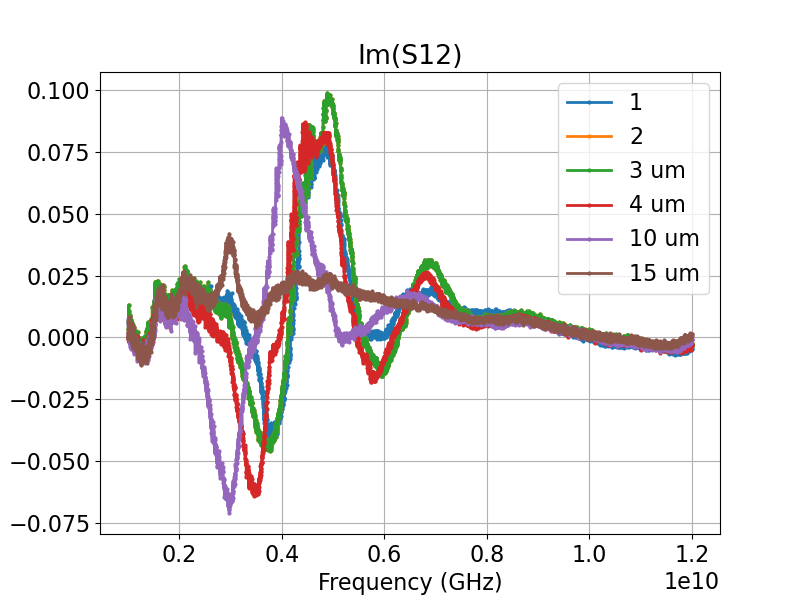

In [16]:
field_index = 1

plt.figure(figsize = (8,6))
plt.title("Im(S12)")
plt.plot(freq[0:], trace1[field_index,0:]) #zero field
plt.plot(freq[0:], trace2[field_index,0:]) #zero field
plt.plot(freq[0:], trace3[field_index,0:]) #zero field
plt.plot(freq[0:], trace4[field_index,0:]) #zero field
plt.plot(freq[0:], trace5[field_index,0:]) #zero field
plt.plot(freq[0:], trace6[field_index,0:]) #zero field
plt.xlabel("Frequency (GHz)")
plt.ylabel("Im(S12) [arb. u.]")
plt.legend(['1', '2','3 um', '4 um', '10 um', '15 um'])
plt.show()

# plt.figure(figsize = (8,6))
# plt.title("Im(S12)")
# S11_1 = (np.abs(re_trace1[1,0:]+1j*im_trace1[1,0:])-np.abs(re_ref1[1,0:]+1j*im_ref1[1,0:]))/np.abs(re_ref1[1,0:]+1j*im_ref1[1,0:])
# S11_2 = (np.abs(re_trace2[1,0:]+1j*im_trace2[1,0:])-np.abs(re_ref2[1,0:]+1j*im_ref2[1,0:]))/np.abs(re_ref2[1,0:]+1j*im_ref2[1,0:])
# S11_3 = (np.abs(re_trace3[1,0:]+1j*im_trace3[1,0:])-np.abs(re_ref3[1,0:]+1j*im_ref3[1,0:]))/np.abs(re_ref3[1,0:]+1j*im_ref3[1,0:])
# S11_4 = (np.abs(re_trace4[1,0:]+1j*im_trace4[1,0:])-np.abs(re_ref4[1,0:]+1j*im_ref4[1,0:]))/np.abs(re_ref4[1,0:]+1j*im_ref4[1,0:])
# S11_5 = (np.abs(re_trace5[1,0:]+1j*im_trace5[1,0:])-np.abs(re_ref5[1,0:]+1j*im_ref5[1,0:]))/np.abs(re_ref5[1,0:]+1j*im_ref5[1,0:])
# S11_6 = (np.abs(re_trace6[1,0:]+1j*im_trace6[1,0:])-np.abs(re_ref6[1,0:]+1j*im_ref6[1,0:]))/np.abs(re_ref6[1,0:]+1j*im_ref6[1,0:])

# plt.figure(figsize = (8,6))
# plt.plot(freq[0:], S11_1) #zero field
# plt.plot(freq[0:], S11_2) #zero field
# plt.plot(freq[0:], S11_3) #zero field
# plt.plot(freq[0:], S11_4) #zero field
# plt.plot(freq[0:], S11_5) #zero field
# plt.plot(freq[0:], S11_6) #zero field
# plt.xlabel("Frequency (GHz)")
# plt.ylabel("S11 [arb. u.]")
# plt.legend(['1', '2','3 um', '4 um', '10 um', '15 um'])
# plt.show()

In [17]:
import math
r = 4e-6 #distance antennas
w = 3.9e-6
t = 25e-9
l = 60e-6
Ms = 1.25e6
A = 1e-11
alpha = 5.11e-3
gamma_CoFeB = 29 * 1e9*4*math.pi/1e7

Hext_mt = 35 #mt
Tesla_to_Am = 1e7/(4*math.pi)

step = 1e4
kx = np.arange(0,1e7, step)
m = 5
ome = []

Hext = Hext_mt*Tesla_to_Am
for i in range(1,m+1,1):
    ky = i*np.pi/w
    P = 1+(np.exp(-kx*t)-1) /(kx*t)
    H1 = Hext +Ms*(1-P)
    H2 = Hext +Ms*(P*((kx**2) / (kx**2 + ky**2)))
    ome.append(gamma_CoFeB*np.sqrt(H1*H2))
    plt.plot(kx, ome[i-1])
    plt.ylim([3.16])

plt.legend(['1','2','3','4','5'])

C:\Users\andre\AppData\Local\Temp\ipykernel_14728\3247893016.py:22: RuntimeWarning: invalid value encountered in divide
  P = 1+(np.exp(-kx*t)-1) /(kx*t)


ValueError: not enough values to unpack (expected 2, got 1)

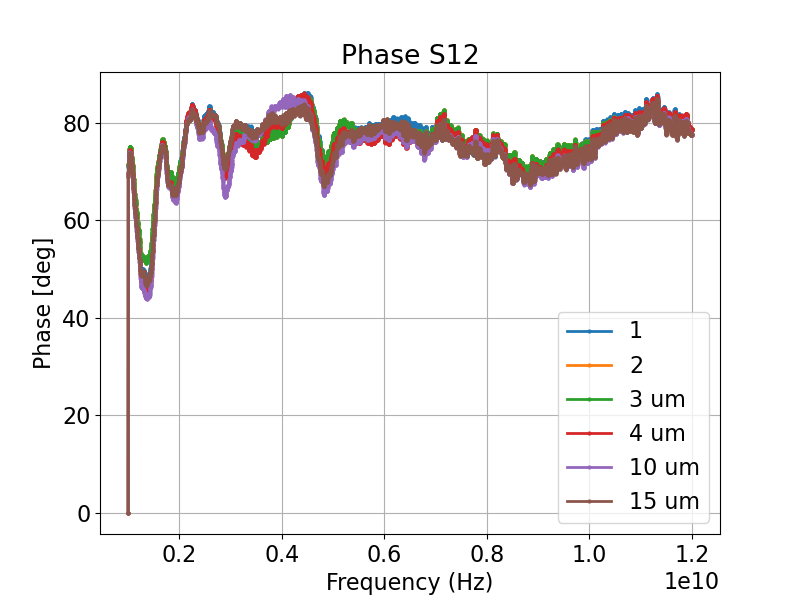

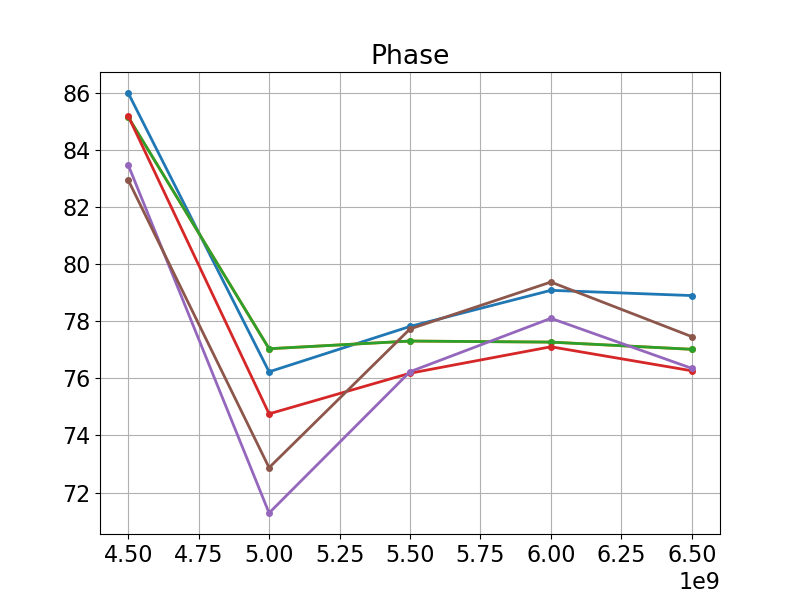

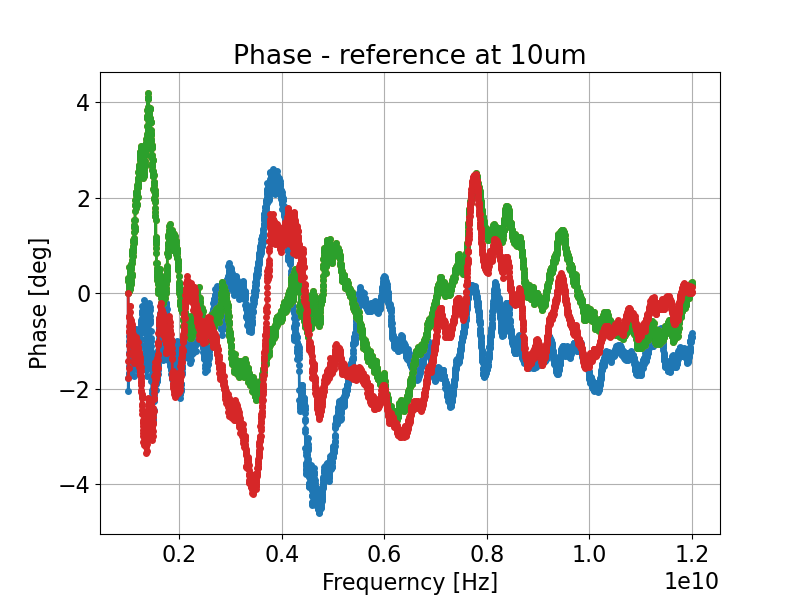

In [18]:
phase1 = np.unwrap(np.angle(re_trace1[field_index,0:] +1j*im_trace1[field_index,0:]))*180/np.pi
phase2 = np.unwrap(np.angle(re_trace2[field_index,0:] +1j*im_trace2[field_index,0:]))*180/np.pi
phase3 = np.unwrap(np.angle(re_trace3[field_index,0:] +1j*im_trace3[field_index,0:]))*180/np.pi
phase4 = np.unwrap(np.angle(re_trace4[field_index,0:] +1j*im_trace4[field_index,0:]))*180/np.pi
phase5 = np.unwrap(np.angle(re_trace5[field_index,0:] +1j*im_trace5[field_index,0:]))*180/np.pi
phase6 = np.unwrap(np.angle(re_trace6[field_index,0:] +1j*im_trace6[field_index,0:]))*180/np.pi

plt.figure(figsize=(8,6))
plt.title("Phase S12")
plt.plot(freq[0:], phase1) #zero field
plt.plot(freq[0:], phase2) #zero field
plt.plot(freq[0:], phase3) #zero field
plt.plot(freq[0:], phase4) #zero field
plt.plot(freq[0:], phase5) #zero field
plt.plot(freq[0:], phase6) #zero field
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase [deg]")
plt.legend(['1', '2','3 um', '4 um', '10 um', '15 um'])
plt.show()

freq_phase = [4.5e9,5e9,5.5e9,6e9,6.5e9]
phase_plt = np.zeros((len(freq_phase), n_traces))


for i in range(len(freq_phase)):
    phase_plt[i,0] = (phase1[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,1] = (phase2[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,2] = (phase3[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,3] = (phase4[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,4] = (phase5[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,5] = (phase6[np.where(freq > freq_phase[i])[0][0]])
plt.figure(figsize=(8,6))
plt.title('Phase')
plt.plot(freq_phase, phase_plt[:,0],'-o')
plt.plot(freq_phase, phase_plt[:,1],'-o')
plt.plot(freq_phase, phase_plt[:,2],'-o')
plt.plot(freq_phase, phase_plt[:,3],'-o')
plt.plot(freq_phase, phase_plt[:,4],'-o')
plt.plot(freq_phase, phase_plt[:,5],'-o')
plt.show()

plt.figure(figsize=(8,6))
plt.title('Phase - reference at 10um')
plt.ylabel('Phase [deg]')
plt.xlabel('Frequerncy [Hz]')
plt.plot(freq, phase6-phase1,'-o')
plt.plot(freq, phase2-phase1,'-o')
plt.plot(freq, phase3-phase1,'-o')
plt.plot(freq, phase4-phase1,'-o')

plt.show()


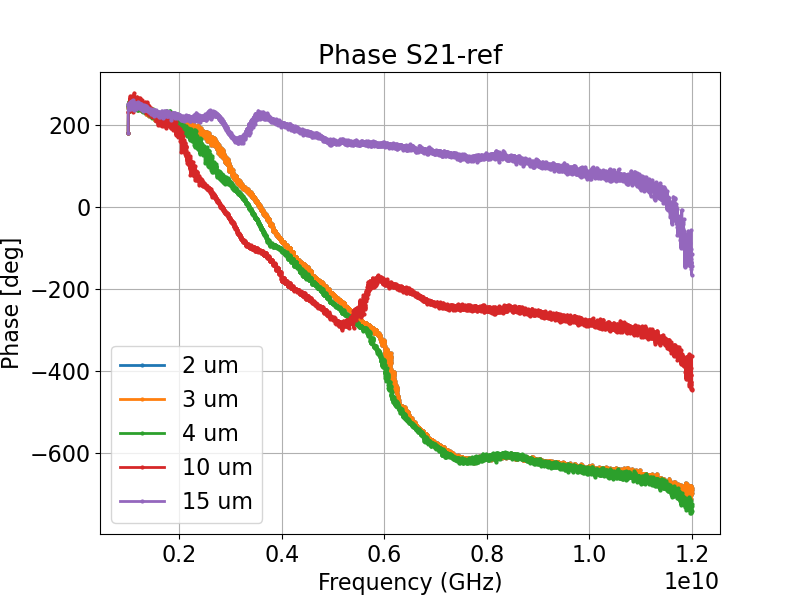

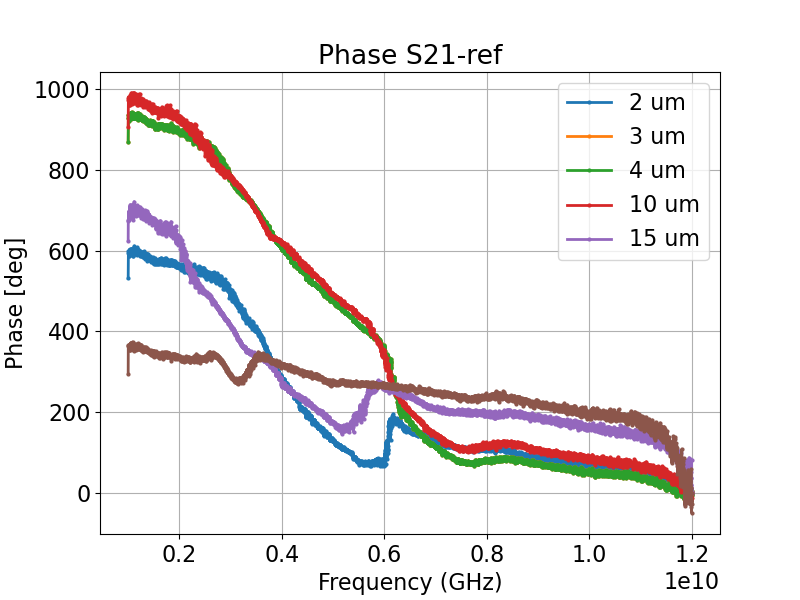

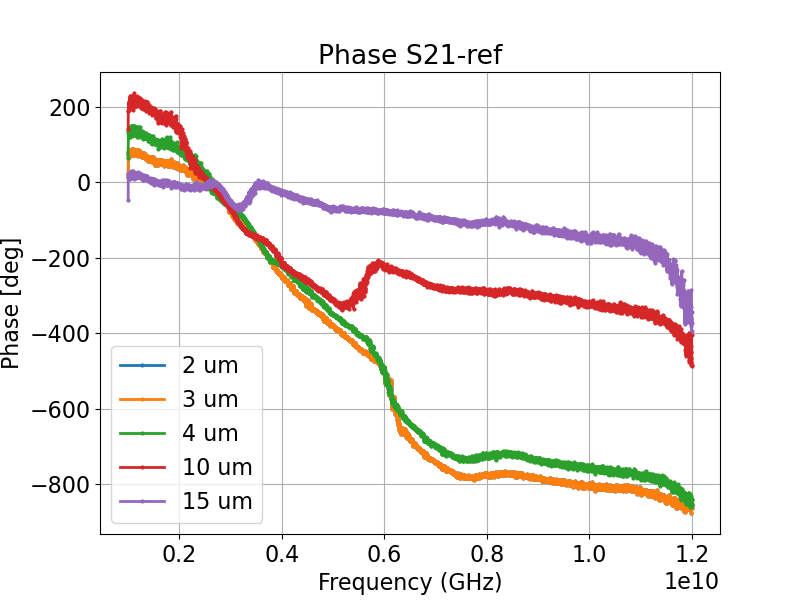

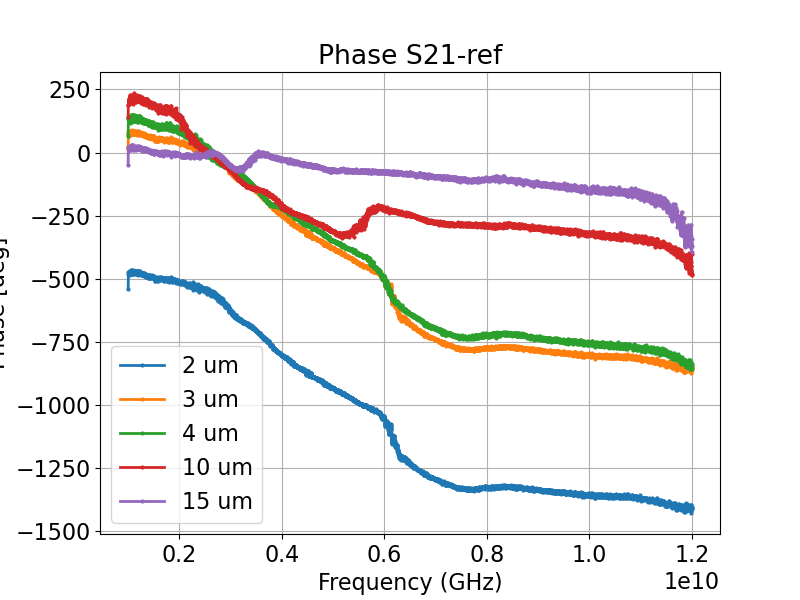

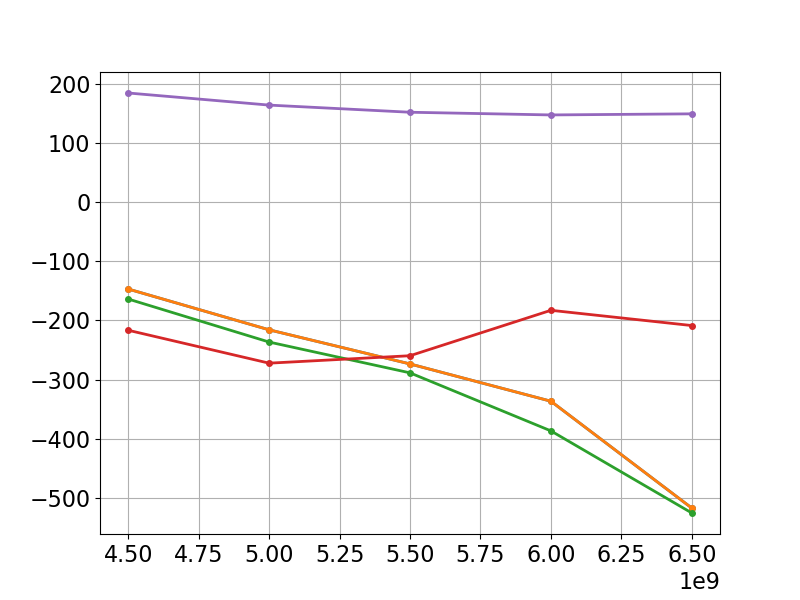

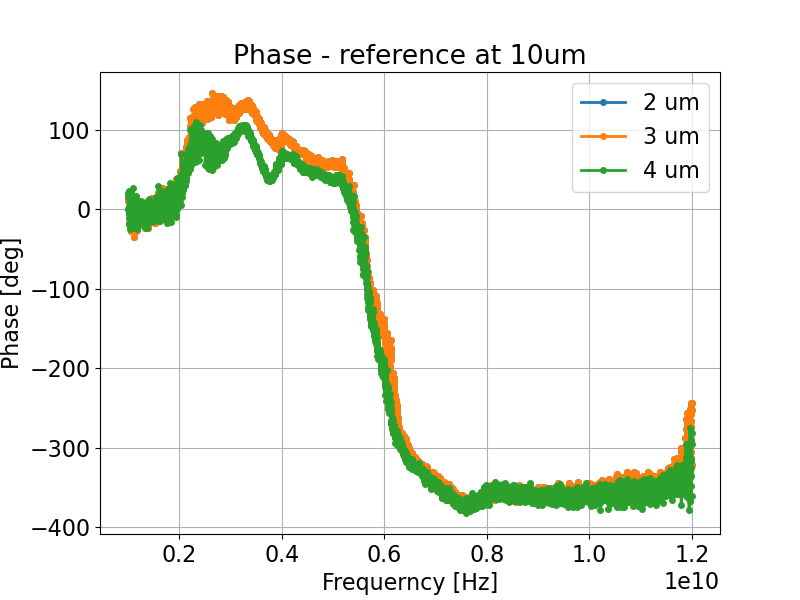

In [19]:
C1 = (re_trace1[field_index,0:] +1j*im_trace1[field_index,0:]) - (re_ref1[field_index,0:] +1j*im_ref1[field_index,0:])
C2 = (re_trace2[field_index,0:] +1j*im_trace2[field_index,0:]) - (re_ref2[field_index,0:] +1j*im_ref2[field_index,0:])
C3 = (re_trace3[field_index,0:] +1j*im_trace3[field_index,0:]) - (re_ref3[field_index,0:] +1j*im_ref3[field_index,0:])
C4 = (re_trace4[field_index,0:] +1j*im_trace4[field_index,0:]) - (re_ref4[field_index,0:] +1j*im_ref4[field_index,0:])
C5 = (re_trace5[field_index,0:] +1j*im_trace5[field_index,0:]) - (re_ref5[field_index,0:] +1j*im_ref5[field_index,0:])
C6 = (re_trace6[field_index,0:] +1j*im_trace6[field_index,0:]) - (re_ref6[field_index,0:] +1j*im_ref6[field_index,0:])


phase1_ref = np.unwrap(np.angle(C1))*180/np.pi
phase2_ref = np.unwrap(np.angle(C2))*180/np.pi
phase3_ref = np.unwrap(np.angle(C3))*180/np.pi
phase4_ref = np.unwrap(np.angle(C4))*180/np.pi
phase5_ref = np.unwrap(np.angle(C5))*180/np.pi
phase6_ref = np.unwrap(np.angle(C6))*180/np.pi


plt.figure(figsize=(8,6))
plt.title("Phase S21-ref")
#plt.plot(freq[0:], phase1_ref) #zero field
plt.plot(freq[0:], phase2_ref) #zero field
plt.plot(freq[0:], phase3_ref) #zero field
plt.plot(freq[0:], phase4_ref) #zero field
plt.plot(freq[0:], phase5_ref) #zero field
plt.plot(freq[0:], phase6_ref) #zero field
plt.xlabel("Frequency (GHz)")
plt.ylabel("Phase [deg]")
plt.legend([ '2 um','3 um', '4 um', '10 um', '15 um'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("Phase S21-ref")
#plt.plot(freq[0:], phase1_ref) #zero field
plt.plot(freq[0:], phase1_ref-phase1_ref[-1]) #zero field
plt.plot(freq[0:], phase2_ref-phase2_ref[-1]) #zero field
plt.plot(freq[0:], phase3_ref-phase3_ref[-1]) #zero field
plt.plot(freq[0:], phase4_ref-phase4_ref[-1]) #zero field
plt.plot(freq[0:], phase5_ref-phase5_ref[-1]) #zero field
plt.plot(freq[0:], phase6_ref-phase6_ref[-1]) #zero field
plt.xlabel("Frequency (GHz)")
plt.ylabel("Phase [deg]")
plt.legend([ '2 um','3 um', '4 um', '10 um', '15 um'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("Phase S21-ref")
#plt.plot(freq[0:], phase1_ref) #zero field
plt.plot(freq[0:], phase2_ref-phase2_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.plot(freq[0:], phase3_ref-phase3_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.plot(freq[0:], phase4_ref-phase4_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.plot(freq[0:], phase5_ref-phase5_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.plot(freq[0:], phase6_ref-phase6_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.xlabel("Frequency (GHz)")
plt.ylabel("Phase [deg]")
plt.legend([ '2 um','3 um', '4 um', '10 um', '15 um'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("Phase S21-ref")
#plt.plot(freq[0:], phase1_ref) #zero field
plt.plot(freq[0:], phase2_ref-360*2) #zero field
plt.plot(freq[0:], phase3_ref-phase3_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.plot(freq[0:], phase4_ref-phase4_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.plot(freq[0:], phase5_ref-phase5_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.plot(freq[0:], phase6_ref-phase6_ref[np.where(freq>2.6e9)[0][0]]) #zero field
plt.xlabel("Frequency (GHz)")
plt.ylabel("Phase [deg]")
plt.legend([ '2 um','3 um', '4 um', '10 um', '15 um'])
plt.show()


for i in range(len(freq_phase)):
    phase_plt[i,0] = (phase1_ref[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,1] = (phase2_ref[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,2] = (phase3_ref[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,3] = (phase4_ref[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,4] = (phase5_ref[np.where(freq > freq_phase[i])[0][0]])
    phase_plt[i,5] = (phase6_ref[np.where(freq > freq_phase[i])[0][0]])
plt.figure(figsize=(8,6))
#plt.plot(freq_phase, phase_plt[:,0],'-o')
plt.plot(freq_phase, phase_plt[:,1],'-o')
plt.plot(freq_phase, phase_plt[:,2],'-o')
plt.plot(freq_phase, phase_plt[:,3],'-o')
plt.plot(freq_phase, phase_plt[:,4],'-o')
plt.plot(freq_phase, phase_plt[:,5],'-o')
plt.show()

plt.figure(figsize=(8,6))
plt.title('Phase - reference at 10um')
plt.ylabel('Phase [deg]')
plt.xlabel('Frequerncy [Hz]')
#plt.plot(freq, phase1_ref-phase5_ref,'-o')
plt.plot(freq, phase2_ref-phase5_ref,'-o')
plt.plot(freq, phase3_ref-phase5_ref,'-o')
plt.plot(freq, phase4_ref-phase5_ref,'-o')

plt.legend([ '2 um','3 um', '4 um', '10 um', '15 um'])

plt.show()

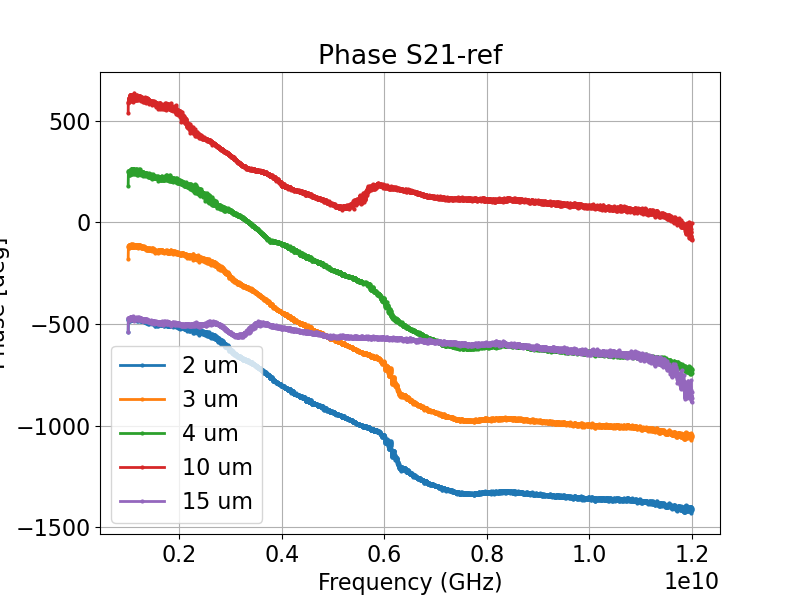

In [20]:
plt.figure(figsize=(8,6))
plt.title("Phase S21-ref")
#plt.plot(freq[0:], phase1_ref) #zero field
plt.plot(freq[0:], phase2_ref-360*2) #zero field
plt.plot(freq[0:], phase3_ref-360) #zero field
plt.plot(freq[0:], phase4_ref) #zero field
plt.plot(freq[0:], phase5_ref+360) #zero field
plt.plot(freq[0:], phase6_ref-360*2) #zero field
plt.xlabel("Frequency (GHz)")
plt.ylabel("Phase [deg]")
plt.legend([ '2 um','3 um', '4 um', '10 um', '15 um'])
plt.show()

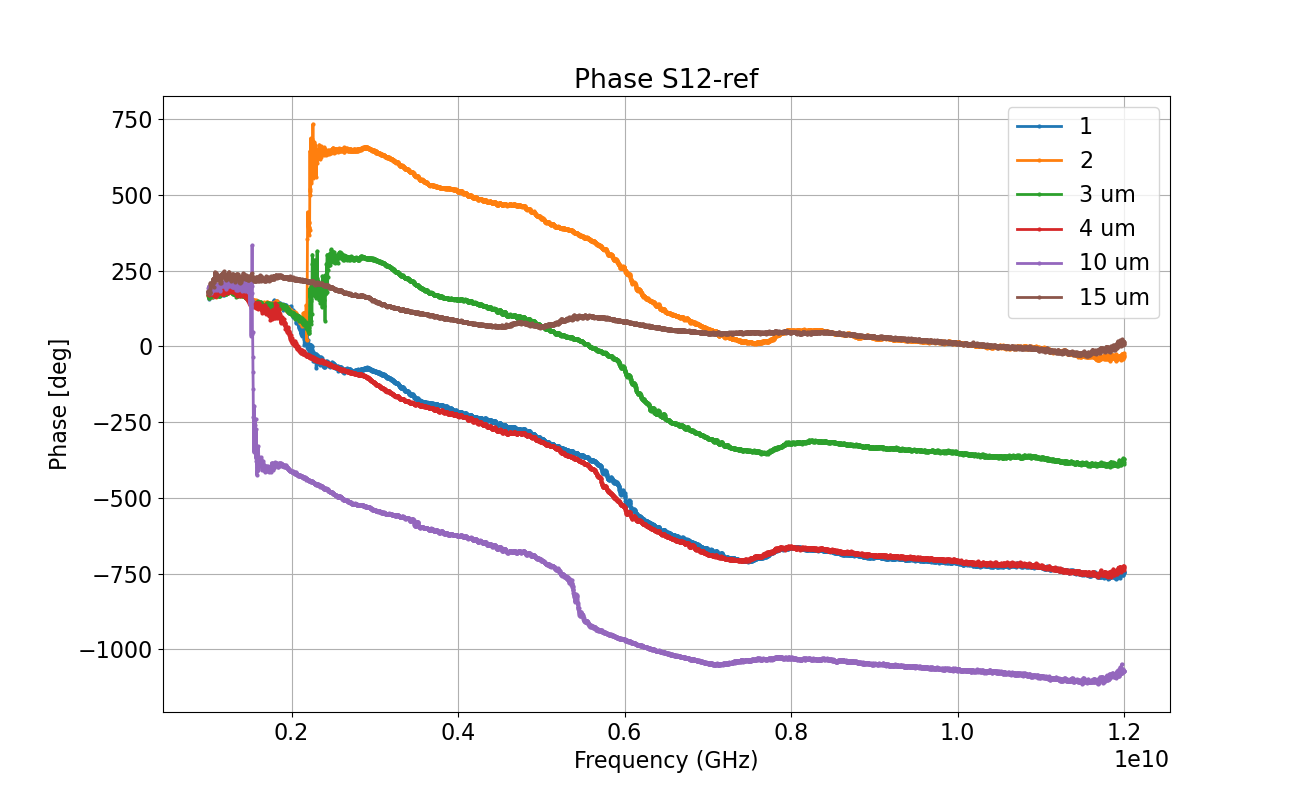

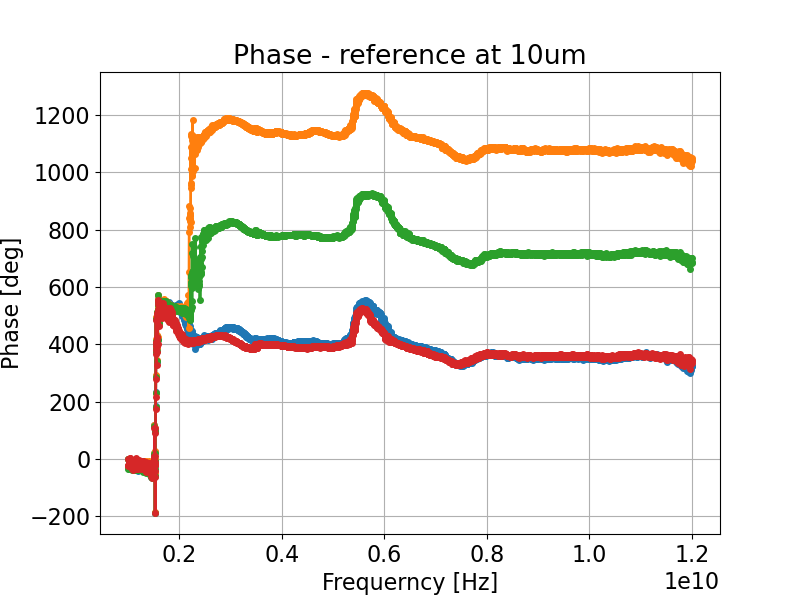

In [13]:
C11 = ((re_trace1[field_index,0:] +1j*im_trace1[field_index,0:]) - (re_ref1[field_index,0:] +1j*im_ref1[field_index,0:]))/(re_ref1[field_index,0:] +1j*im_ref1[field_index,0:])
C22 = ((re_trace2[field_index,0:] +1j*im_trace2[field_index,0:]) - (re_ref2[field_index,0:] +1j*im_ref2[field_index,0:]))/(re_ref2[field_index,0:] +1j*im_ref2[field_index,0:])
C33 = ((re_trace3[field_index,0:] +1j*im_trace3[field_index,0:]) - (re_ref3[field_index,0:] +1j*im_ref3[field_index,0:]))/(re_ref3[field_index,0:] +1j*im_ref3[field_index,0:])
C44 = ((re_trace4[field_index,0:] +1j*im_trace4[field_index,0:]) - (re_ref4[field_index,0:] +1j*im_ref4[field_index,0:]))/(re_ref4[field_index,0:] +1j*im_ref4[field_index,0:])
C55 = ((re_trace5[field_index,0:] +1j*im_trace5[field_index,0:]) - (re_ref5[field_index,0:] +1j*im_ref5[field_index,0:]))/(re_ref5[field_index,0:] +1j*im_ref5[field_index,0:])
C66 = ((re_trace6[field_index,0:] +1j*im_trace6[field_index,0:]) - (re_ref6[field_index,0:] +1j*im_ref6[field_index,0:]))/(re_ref6[field_index,0:] +1j*im_ref6[field_index,0:])


phase1_ref = np.unwrap(np.angle(C11))*180/np.pi
phase2_ref = np.unwrap(np.angle(C22))*180/np.pi
phase3_ref = np.unwrap(np.angle(C33))*180/np.pi
phase4_ref = np.unwrap(np.angle(C44))*180/np.pi
phase5_ref = np.unwrap(np.angle(C55))*180/np.pi
phase6_ref = np.unwrap(np.angle(C66))*180/np.pi


plt.figure()
plt.title("Phase S12-ref")
plt.plot(freq[0:], phase1_ref) #zero field
plt.plot(freq[0:], phase2_ref) #zero field
plt.plot(freq[0:], phase3_ref) #zero field
plt.plot(freq[0:], phase4_ref) #zero field
plt.plot(freq[0:], phase5_ref) #zero field
plt.plot(freq[0:], phase6_ref) #zero field
plt.xlabel("Frequency (GHz)")
plt.ylabel("Phase [deg]")
plt.legend(['1', '2','3 um', '4 um', '10 um', '15 um'])
plt.show()


plt.figure(figsize=(8,6))
plt.title('Phase - reference at 10um')
plt.ylabel('Phase [deg]')
plt.xlabel('Frequerncy [Hz]')
plt.plot(freq, phase1_ref-phase5_ref,'-o')
plt.plot(freq, phase2_ref-phase5_ref,'-o')
plt.plot(freq, phase3_ref-phase5_ref,'-o')
plt.plot(freq, phase4_ref-phase5_ref,'-o')


plt.show()
